## TC 5033
### Word Embeddings

Juan Antonio Chiñas Mata: A01794191 <br>
José Alejandro Cortés Pérez: A01795033 <br>
Moises Flores Ortíz: A01795489 <br>
Mardonio Manuel Román Ramírez: A01795265 <br>
Miriam Eunice Rosas Medellín: A01795550 <br><br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:
    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)



#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.spatial import distance
import pickle
plt.style.use('ggplot')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### Load file

In [2]:
# Load file
PATH = '/content/drive/My Drive/Colab Notebooks/MNA/TC5033 - Deep Learning/Semana_7/glove.6B.50d.txt'
emb_dim = 50

In [5]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    """
    Creates a dictionary of word embeddings from a text file where each line contains
    a word followed by its embedding vector.

    Parameters:
    ----------
    path: str
        The file path to the embeddings file.

    Returns:
    -------
    dict
        A dictionary where each key is a word (str) and each value is a NumPy array
        representing the embedding vector (np.ndarray) for that word.
    """
    embeddings_dict = {}
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype=np.float32)
            embeddings_dict[word] = vector
    return embeddings_dict

In [6]:
# Create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [7]:
# Serialize
with open('/content/drive/My Drive/Colab Notebooks/MNA/TC5033 - Deep Learning/Semana_7/embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

In [8]:
# Deserialize
with open('/content/drive/My Drive/Colab Notebooks/MNA/TC5033 - Deep Learning/Semana_7/embeddings_dict_50D.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

#### See some embeddings

In [11]:
# Show some embeddings
def show_n_first_words(path, n_words):
    """
    Displays the first `n_words` word embeddings from a text file where each line
    contains a word followed by its embedding vector.

    Parameters:
    ----------
    path: str
        The file path to the embeddings file.

    n_words: int
        The number of words (and their embeddings) to display.

    Returns:
    -------
    None
        This function does not return anything. It prints each word and its embedding
        vector, along with the length of the vector, for the first `n_words` entries
        in the file.
    """
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            print(line.split(), len(line.split()[1:]))
            if i>=n_words: break

In [12]:
# Show first words
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [13]:
# Function to plot embeddings
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict=None, func=PCA):
    """
    Plots word embeddings in 2D space using dimensionality reduction.

    Parameters:
    ----------
    emb_path: str
        The file path to the embeddings file, if `embeddings_dict` is not provided.

    words2show: list of str
        A list of words whose embeddings will be displayed in the plot.

    emb_dim: int
        The dimensionality of the embeddings in `emb_path`.

    embeddings_dict: dict, optional
        A preloaded dictionary of embeddings where each key is a word (str) and each value
        is a NumPy array representing the embedding vector (np.ndarray). If not provided,
        `emb_path` will be used to load embeddings.

    func: class, optional
        A dimensionality reduction function or class with a `fit_transform` method that
        reduces embeddings to 2D. The default is `PCA`, but other options like `TSNE`
        or `UMAP` can also be used if they are imported.

    Returns:
    -------
    None
        This function does not return anything. It displays a 2D scatter plot of the word
        embeddings.
    """
    # Prepare the embeddings array by directly indexing
    embeddings = np.array([embeddings_dict[word] for word in words2show])

    # Apply dimensionality reduction
    reducer = func(n_components=2)

    if hasattr(reducer, 'random_state'): # Verify if random_state parameter required for the reducer function
        reducer.random_state = 42
    vectors_2d = reducer.fit_transform(embeddings)

    # Plotting
    plt.figure(figsize=(15, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='c')
    for i, word in enumerate(words2show):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

    plt.title(f'{func.__name__} Projection of Word Embeddings') # Reduction func + title
    plt.grid(True)
    plt.show()

In [14]:
# Define words to plot
words = ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

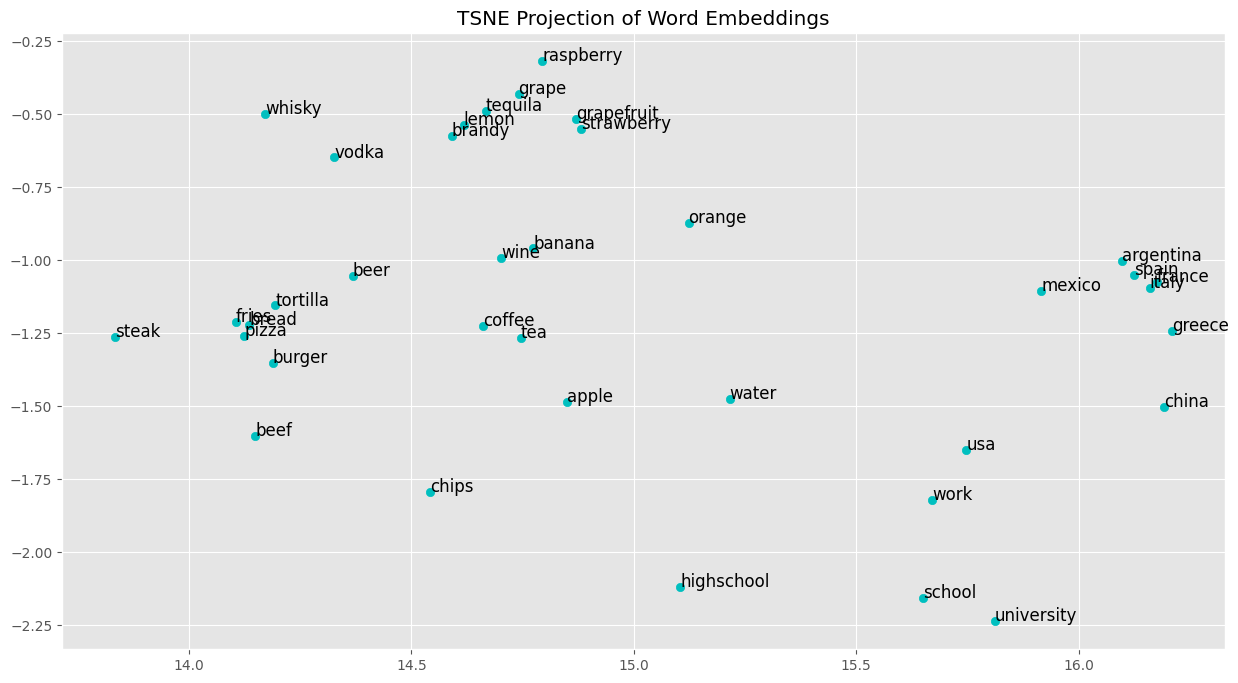

In [15]:
# Plot embeddings
plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

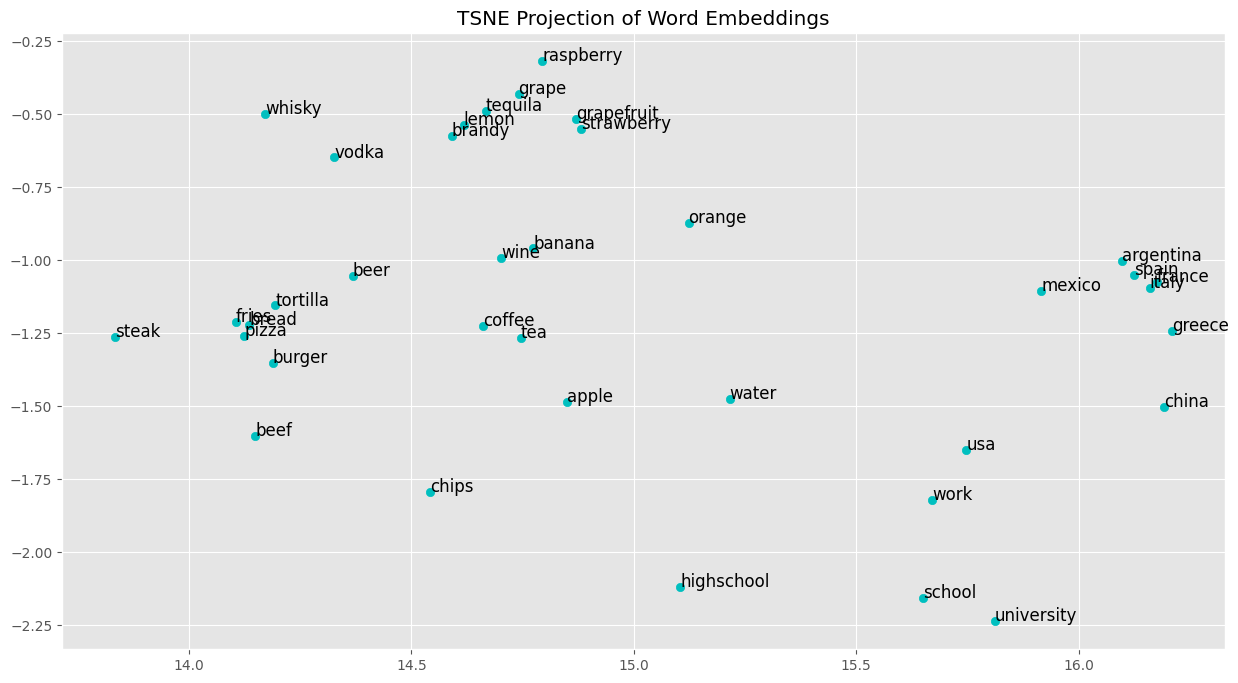

In [16]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

#### General Interpretation:
The plot shows a 2D representation of the relationships between the selected words based on their GloVe embeddings. Words that are semantically similar or belong to the same category tend to cluster together in the plot. Words that are dissimilar are located farther apart.

#### Specific Observations:
- **Countries**: Words representing countries, such as 'mexico', 'argentina', 'china', 'spain', 'france', 'italy', etc., tend to form a cluster. This indicates that the embeddings capture the semantic similarity between countries.
- **Fruits**: There are clusters that may be identified as fruits, such as: 'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry'. This indicates that the embedding captures similarities between them.
- **Outliers**: Some words might appear as outliers or not clearly belong to any specific cluster. This could be due to the words having unique meanings or contexts that are not well-represented by the embeddings or the dimensionality reduction process.

### Compute analogies

In [17]:
# Analogy
def analogy(word1, word2, word3, embeddings_dict):
    """
    Finds the word that completes the analogy: "word1 is to word2 as word3 is to ?".

    Parameters:
    ----------
    word1: str
        The first word in the analogy (e.g., "man" in "man : woman :: king : queen").

    word2: str
        The second word in the analogy (e.g., "woman" in "man : woman :: king : queen").

    word3: str
        The third word in the analogy (e.g., "king" in "man : woman :: king : queen").

    embeddings_dict: dict
        A dictionary where each key is a word (str) and each value is a NumPy array
        representing the embedding vector (np.ndarray) for that word.

    Returns:
    -------
    str
        The word that best completes the analogy based on cosine similarity.
    """
    # Check if words are in the embeddings dictionary
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        raise ValueError('One or more words not found in the embeddings dictionary.')

    # Get the embeddings for the words
    vec1 = embeddings_dict[word1]
    vec2 = embeddings_dict[word2]
    vec3 = embeddings_dict[word3]

    # Calculate the analogy vector
    analogy_vector = vec2 - vec1 + vec3

    # Find the closest word to the analogy vector
    closest_word = None
    closest_dist = float('inf')

    for word, vec in embeddings_dict.items():
        if word not in {word1, word2, word3}: # Avoid using the original words
            dist = distance.euclidean(analogy_vector, vec)
            if dist < closest_dist:
                closest_dist = dist
                closest_word = word

    return closest_word

### Explanation of the analogy vector
In natural language processing, the "analogy vector" represents relationships between words in a way that we can understand mathematically. This concept is often phrased as "A is to B as C is to D." For example, we could say, "King is to Queen as Man is to Woman."

When words are represented as vectors (meaning they have a position in space that captures their meanings and relationships), we can use the difference between vectors to represent relationships. In this case, the relationship between "King" and "Queen" can be thought of as a specific direction or "difference" in this space, and the same direction often holds between related pairs, like "Man" and "Woman."



In [18]:
# Run first analogy
analogy_1 = analogy('man', 'king', 'woman', embeddings_dict)
print(f'man is a king as woman is a {analogy_1}')

man is a king as woman is a queen


In [19]:
# Run second analogy
analogy_2 = analogy('paris', 'france', 'tokyo', embeddings_dict)
print(f'paris is a france as tokyo is a {analogy_2}')

paris is a farnce as tokyo is a japan


### Compute similarities

In [20]:
# Define function to compute similarities
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Finds the top N most similar words to the given word based on cosine similarity.

    Parameters:
    ----------
    word: str
        The word for which similar words are to be found.

    embeddings_dict: dict
        A dictionary where each key is a word (str) and each value is a NumPy array
        representing the embedding vector (np.ndarray) for that word.

    top_n: int, optional
        The number of similar words to return, sorted by similarity score in descending
        order. Default is 10.

    Returns:
    -------
    list of tuple
        A list of tuples where each tuple contains a word (str) and its similarity score (float),
        sorted in descending order by similarity. Each word in the list is among the top N most
        similar words to the input word.
    """
    # Check if the word is in the embeddings dictionary
    if word not in embeddings_dict:
        raise ValueError(f'The word {word} is not found in the embeddings dictionary.')

    # Get the embedding for the specified word
    word_vec = embeddings_dict[word]

    # Calculate cosine similarity with all other words
    similarities = {}
    for other_word, other_vec in embeddings_dict.items():
        if other_word != word: # Skip the input word
            # Calculate cosine similarity
            sim = 1 - distance.cosine(word_vec, other_vec) # 1 - cosine distance gives similarity
            similarities[other_word] = sim

    # Sort words by similarity
    most_similar_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar_words

In [21]:
# First attempt of computing similarities
most_similar_1 = find_most_similar('mexico', embeddings_dict)

In [22]:
# Show top 10 similarities
for i, (w, score) in enumerate(most_similar_1, 1):
    print(f'{i} ---> {w} (Similarity: {score:.4f})')

1 ---> mexican (Similarity: 0.8551)
2 ---> venezuela (Similarity: 0.8497)
3 ---> colombia (Similarity: 0.8490)
4 ---> peru (Similarity: 0.8446)
5 ---> chile (Similarity: 0.8439)
6 ---> puerto (Similarity: 0.8363)
7 ---> rico (Similarity: 0.8195)
8 ---> cuba (Similarity: 0.8125)
9 ---> guatemala (Similarity: 0.8114)
10 ---> panama (Similarity: 0.8097)


We're observing that the top 10 similarities are all parcial or complete country names in the same region as **Mexico** (Latin America), except for the first one, which is `mexican`, the denonym of **Mexico**.

In [23]:
# Second attempt of computing similarities
most_similar_2 = find_most_similar('cat', embeddings_dict)

In [24]:
# Show top 10 similarities
for i, (w, score) in enumerate(most_similar_2, 1):
    print(f'{i} ---> {w} (Similarity: {score:.4f})')

1 ---> dog (Similarity: 0.9218)
2 ---> rabbit (Similarity: 0.8488)
3 ---> monkey (Similarity: 0.8041)
4 ---> rat (Similarity: 0.7892)
5 ---> cats (Similarity: 0.7865)
6 ---> snake (Similarity: 0.7799)
7 ---> dogs (Similarity: 0.7796)
8 ---> pet (Similarity: 0.7792)
9 ---> mouse (Similarity: 0.7732)
10 ---> bite (Similarity: 0.7729)


We're observing that the top 10 similarities are all animals too, either in singular or plural form, except for the last one, which is `bite`.

### Conclusion
This notebook demonstrated the use of GloVe word embeddings and NumPy for exploring word relationships. We successfully:
- Loaded and processed GloVe embeddings for efficient use.
- Visualized embeddings in 2D using PCA and t-SNE, revealing semantic clusters (countries and food, for example).
- Implemented functions to compute word similarities (e.g., 'mexico' is similar to 'colombia').
Solved word analogies using vector arithmetic (e.g., 'man : king :: woman : queen').
- These techniques highlighted the power of word embeddings in capturing semantic and syntactic relationships, enabling a wide range of NLP applications. This is the basis of more complex applications, such as sentiment analysis, machine translation, etc.